In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from hockey_rink import NHLRink
from scipy.stats import binned_statistic, binned_statistic_2d

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [13]:
df_games = pd.read_csv('data/Linhac_df_processed.csv', index_col=0)
df_move = pd.read_csv("data/Linhac_df_move.csv", index_col=0)
df_old = pd.read_csv("data/Linhac_df_keyed_20_games.csv", index_col=0)


In [ ]:
# Some of the sequences of this file are taken and adopted from the work of David Sumpter and and Aleksander Andrzejewski on Expected Threat (https://soccermatics.readthedocs.io/en/latest/gallery/lesson4/plot_ExpectedThreat.html). I do not take any credit for these sequences 

In [14]:
df_move.eventname.value_counts()

pass       17455
lpr        15412
carry       4375
shot        2230
dumpout     1382
dumpin      1173
Name: eventname, dtype: int64

In [15]:
df_shots = df_move.loc[df_move['eventname'] == 'shot']
df_goals = df_games.loc[df_games['eventname'].isin(['goal'])]

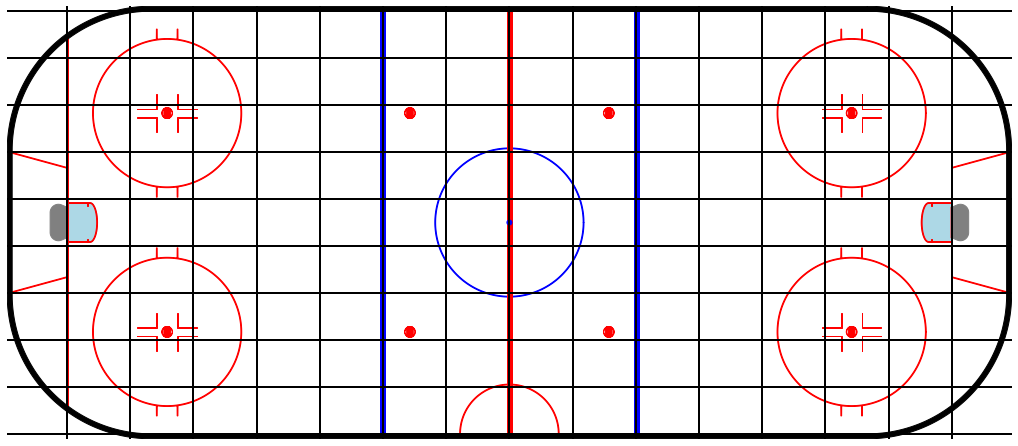

In [17]:
rink = NHLRink()

fig, ax = plt.subplots(figsize=(18, 8))
rink.draw(ax=ax)
for i in (89 / 7) * np.arange(-8, 9):
    ax.axvline(i, color='black', lw=2, zorder=100)

for i in 85 / 9 * np.arange(-4.5, 5):
    ax.axhline(i, color='black', lw=2, zorder=100)
# ax.axvline(-50, color='black', lw=2, zorder=100)
# ax.axvline(-25, color='black', lw=2, zorder=100)
# ax.axvline(0, color='black', lw=2, zorder=100)
# ax.axvline(25, color='black', lw=2, zorder=100)
# ax.axvline(50, color='black', lw=2, zorder=100)

plt.show()

fig.savefig('figs/xt_grid.png',bbox_inches='tight')

In [18]:
85 / 9 * np.arange(-4.5, 5)

array([-42.5       , -33.05555556, -23.61111111, -14.16666667,
        -4.72222222,   4.72222222,  14.16666667,  23.61111111,
        33.05555556,  42.5       ])

In [19]:
(89 / 7) * np.arange(-8, 9)

array([-101.71428571,  -89.        ,  -76.28571429,  -63.57142857,
        -50.85714286,  -38.14285714,  -25.42857143,  -12.71428571,
          0.        ,   12.71428571,   25.42857143,   38.14285714,
         50.85714286,   63.57142857,   76.28571429,   89.        ,
        101.71428571])

$9 \times 16$

In [20]:
moving_actions = binned_statistic_2d(df_move['yadjcoord'], df_move['xadjcoord'], None, statistic='count', bins=[ 85 / 9 * np.arange(-4.5, 5), (89 / 7) * np.arange(-8, 9)])

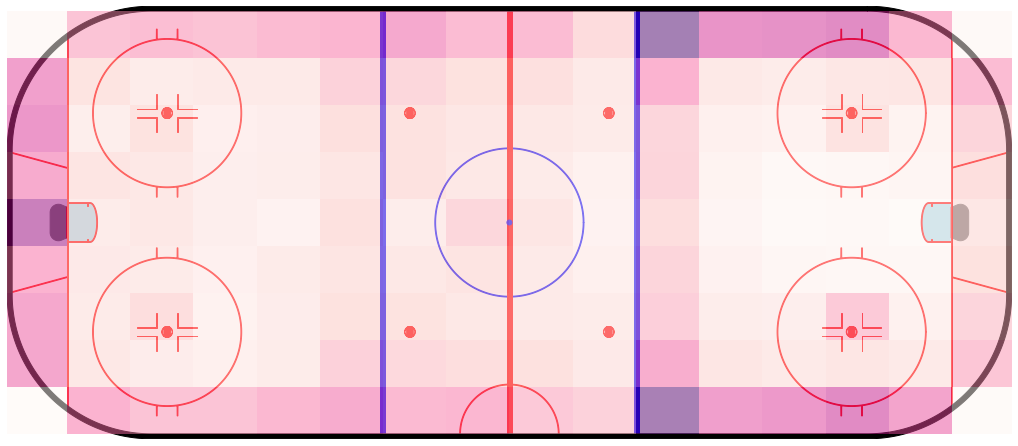

In [21]:
rink = NHLRink()

fig, ax = plt.subplots(figsize=(18, 8))
rink.draw(ax=ax)
plt.imshow(moving_actions.statistic, cmap='RdPu', origin='lower', extent=[-101.71428571, 101.71428571, -42.5, 42.5], alpha=0.5, zorder=100)

plt.show()

In [22]:
shots = binned_statistic_2d(df_shots['yadjcoord'], df_shots['xadjcoord'], None, statistic='count', bins=[ 85 / 9 * np.arange(-4.5, 5), (89 / 7) * np.arange(-8, 9)])

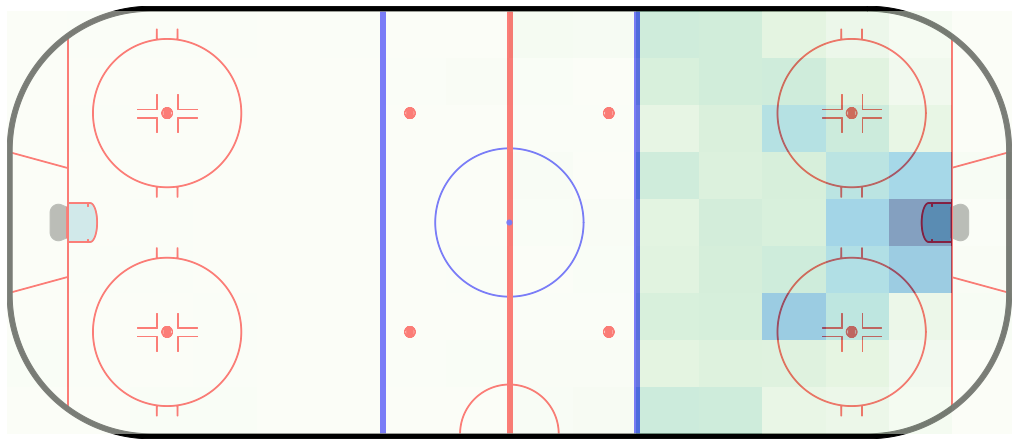

In [23]:
rink = NHLRink()

fig, ax = plt.subplots(figsize=(18, 8))
rink.draw(ax=ax)
plt.imshow(shots.statistic, cmap='GnBu', origin='lower', extent=[-101.71428571, 101.71428571, -42.5, 42.5], alpha=0.5, zorder=100)

plt.show()

In [24]:
goals = binned_statistic_2d(df_shots.loc[df_shots['is_goal'] == 1,'yadjcoord'], df_shots.loc[df_shots['is_goal'] == 1,'xadjcoord'], None, statistic='count', bins=[ 85 / 9 * np.arange(-4.5, 5), (89 / 7) * np.arange(-8, 9)])

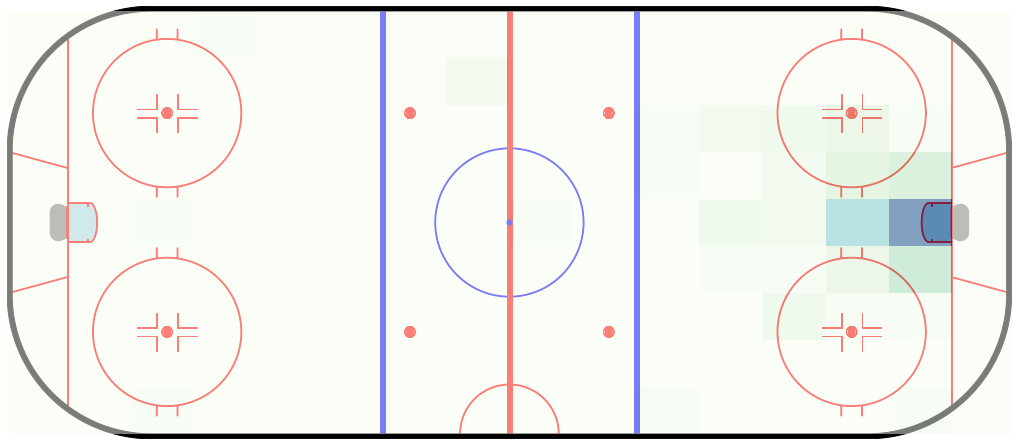

In [25]:
rink = NHLRink()

fig, ax = plt.subplots(figsize=(18, 8))
rink.draw(ax=ax)
plt.imshow(goals.statistic, cmap='GnBu', origin='lower', extent=[-101.71428571, 101.71428571, -42.5, 42.5], alpha=0.5, zorder=100)

plt.show()

In [26]:
move_prob = moving_actions.statistic / (moving_actions.statistic + shots.statistic)

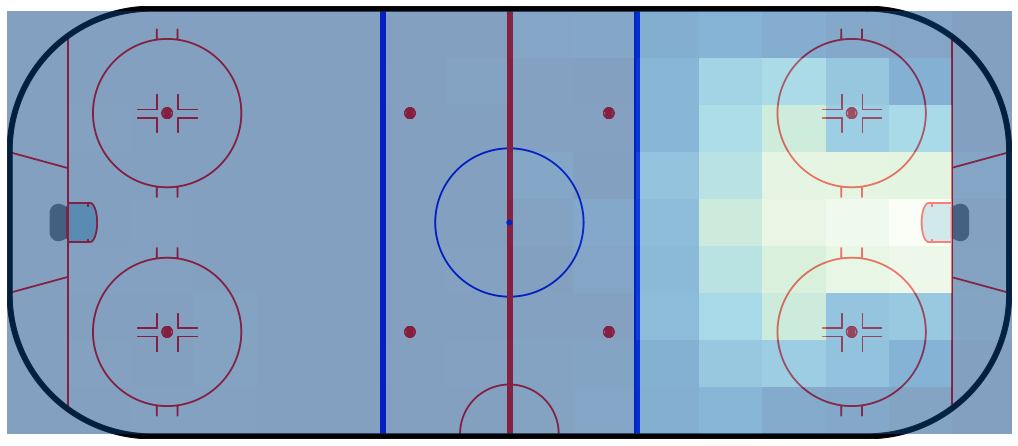

In [27]:
rink = NHLRink()

fig, ax = plt.subplots(figsize=(18, 8))
rink.draw(ax=ax)
plt.imshow(move_prob, cmap='GnBu', origin='lower', extent=[-101.71428571, 101.71428571, -42.5, 42.5], alpha=0.5, zorder=100)

plt.show()

In [28]:
shot_prob = shots.statistic / (moving_actions.statistic + shots.statistic)

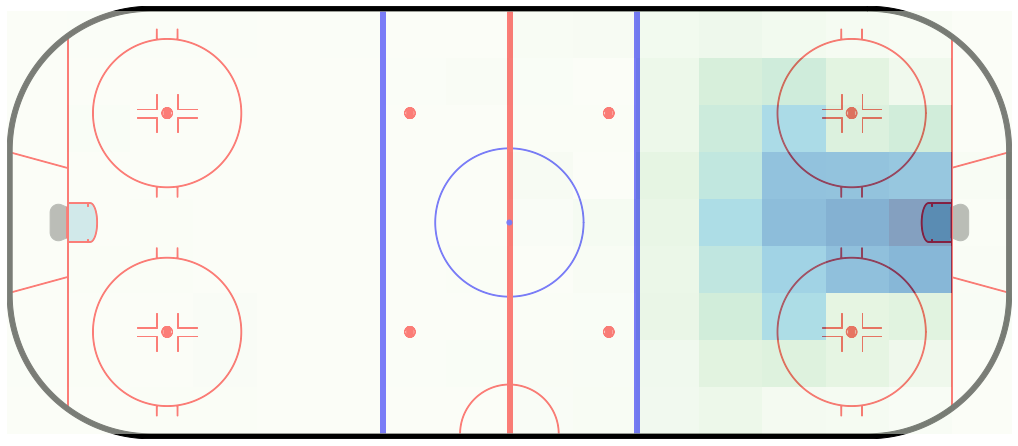

In [29]:
rink = NHLRink()

fig, ax = plt.subplots(figsize=(18, 8))
rink.draw(ax=ax)
plt.imshow(shot_prob, cmap='GnBu', origin='lower', extent=[-101.71428571, 101.71428571, -42.5, 42.5], alpha=0.5, zorder=100)

plt.show()

In [30]:
df_shots[['xadjcoord', 'yadjcoord', 'xg']]
goal_prob = binned_statistic_2d(df_shots['yadjcoord'], df_shots['xadjcoord'], df_shots['xg'], statistic='mean', bins=[ 85 / 9 * np.arange(-4.5, 5), (89 / 7) * np.arange(-8, 9)])

In [31]:
goal_prob = np.nan_to_num(goal_prob.statistic)

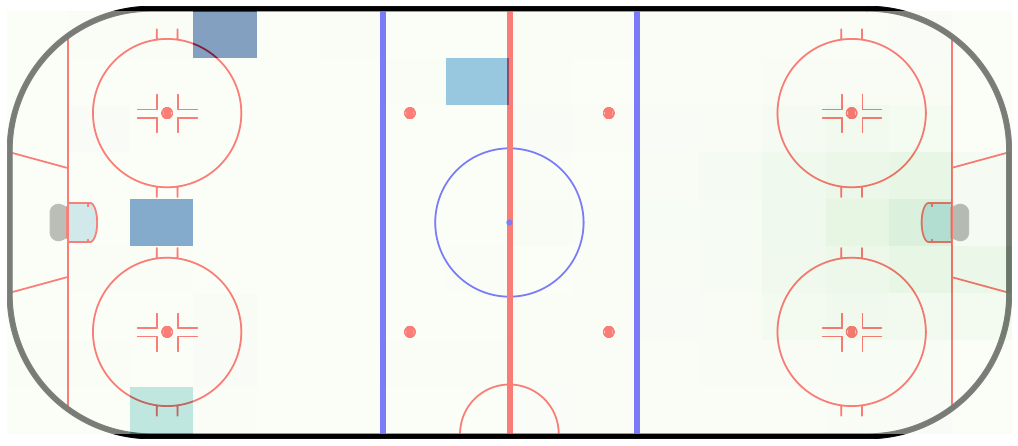

In [32]:
rink = NHLRink()

fig, ax = plt.subplots(figsize=(18, 8))
rink.draw(ax=ax)
plt.imshow(goal_prob, cmap='GnBu', origin='lower', extent=[-101.71428571, 101.71428571, -42.5, 42.5], alpha=0.5, zorder=100)

plt.show()

TODO: I have to workshop the xG model

In [33]:
df_move = df_move[df_move['eventname'] != 'shot']

In [34]:
df_move.loc[:,'y_start'] = pd.cut(df_move.loc[:,'yadjcoord'], bins=9, labels=False)
df_move.loc[:,'x_start'] = pd.cut(df_move.loc[:,'xadjcoord'], bins=16, labels=False)
df_move.loc[:,'y_end'] = pd.cut(df_move.loc[:,'yadjcoord_end'], bins=9, labels=False)
df_move.loc[:,'x_end'] = pd.cut(df_move.loc[:,'xadjcoord_end'], bins=16, labels=False)

In [37]:
df_counts_starts_new = df_move[['x_start', 'y_start']].groupby(['x_start', 'y_start']).size().reset_index().rename(columns={0:'count_starts'})

In [38]:
transition_matrices = []
for i, row in df_counts_starts_new.iterrows():
    start_sector = row[['y_start', 'x_start']].values
    count_starts = row['count_starts']
    this_sector = df_move.loc[(df_move['y_start'] == start_sector[0]) & (df_move['x_start'] == start_sector[1])]
    df_counts_ends = this_sector[['y_end', 'x_end']].groupby(['y_end', 'x_end']).size().reset_index().rename(columns={0:'count_ends'})
    T_matrix = np.zeros((9, 16))
    for j, row2 in df_counts_ends.iterrows():
        end_sector = row2[['y_end', 'x_end']].values
        count_ends = row2['count_ends']
        T_matrix[end_sector[0], end_sector[1]] = count_ends / count_starts
    T_matrix = T_matrix / count_starts
    transition_matrices.append(T_matrix)


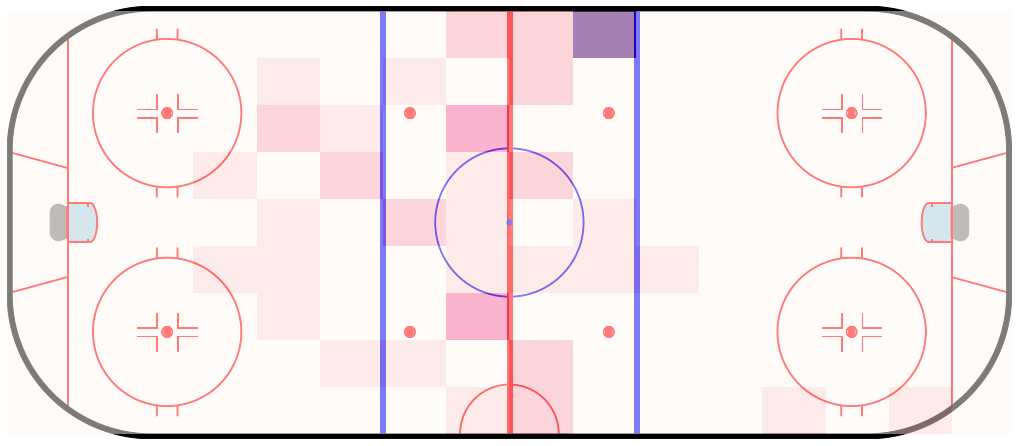

In [41]:
rink = NHLRink()
fig, ax = plt.subplots(figsize=(18, 8))
rink.draw(ax=ax)
plt.imshow(transition_matrices[58], cmap='RdPu', origin='lower', extent=[-101.71428571, 101.71428571, -42.5, 42.5], alpha=0.5, zorder=100)

plt.show()

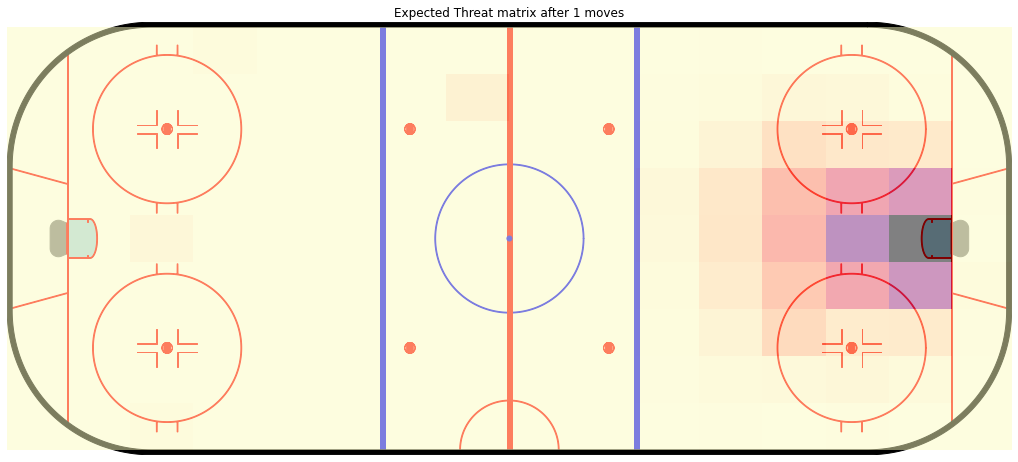

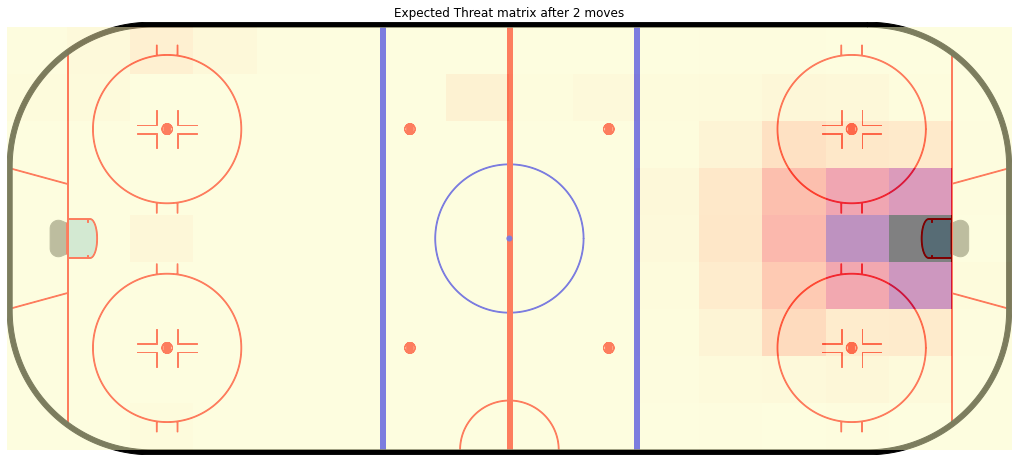

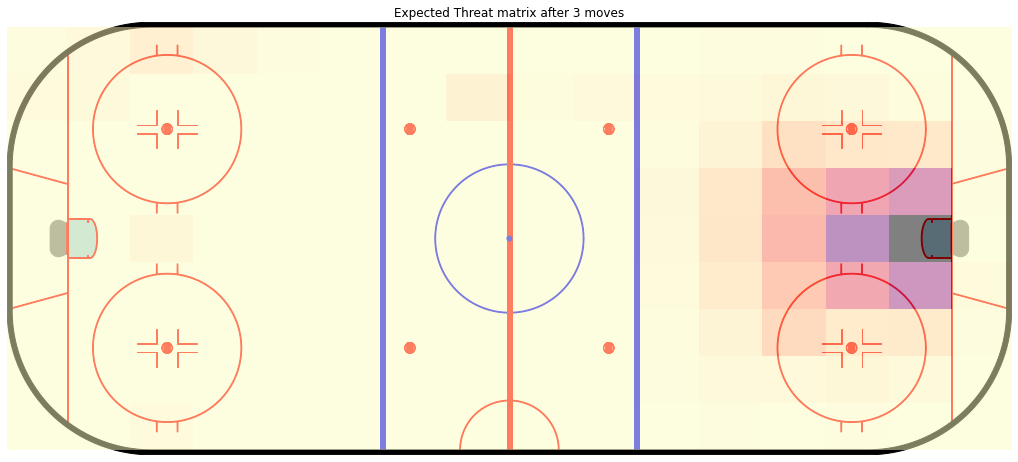

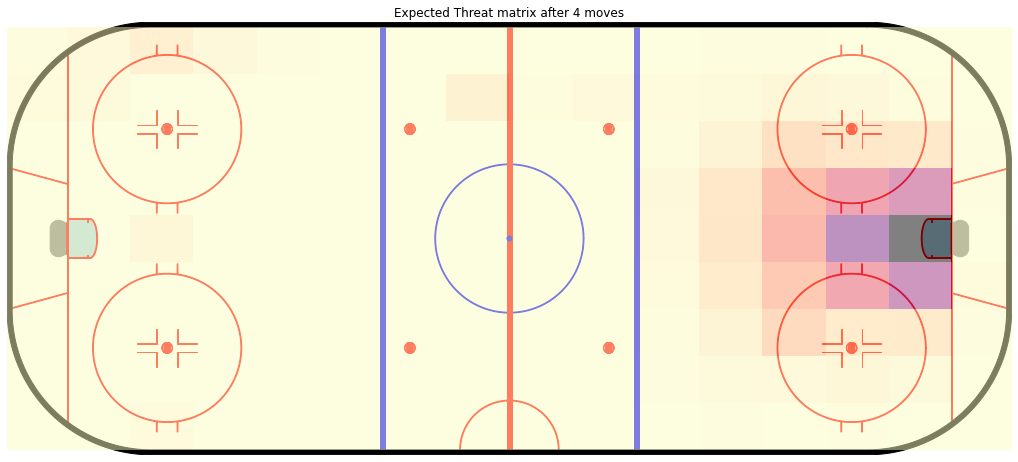

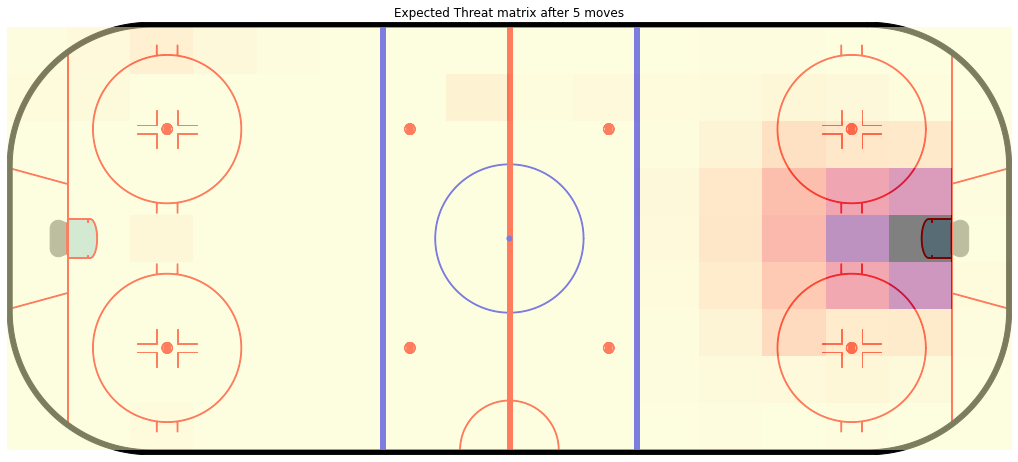

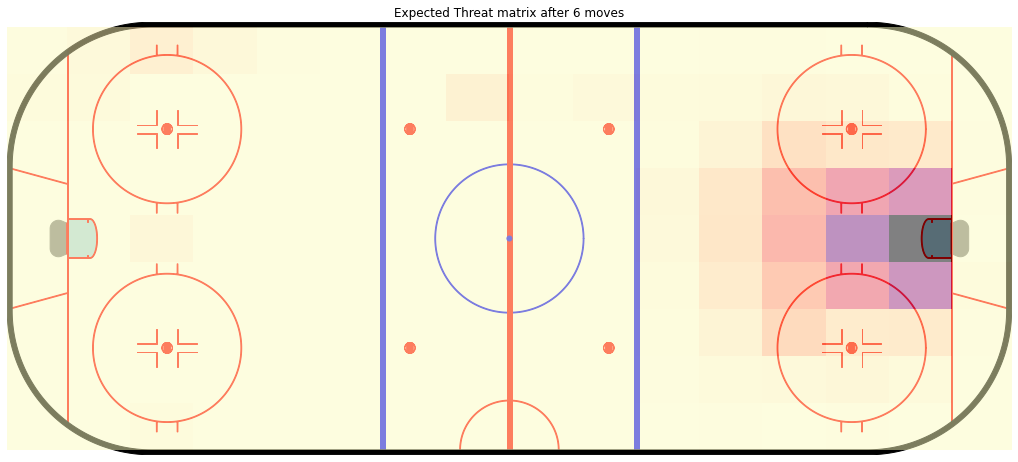

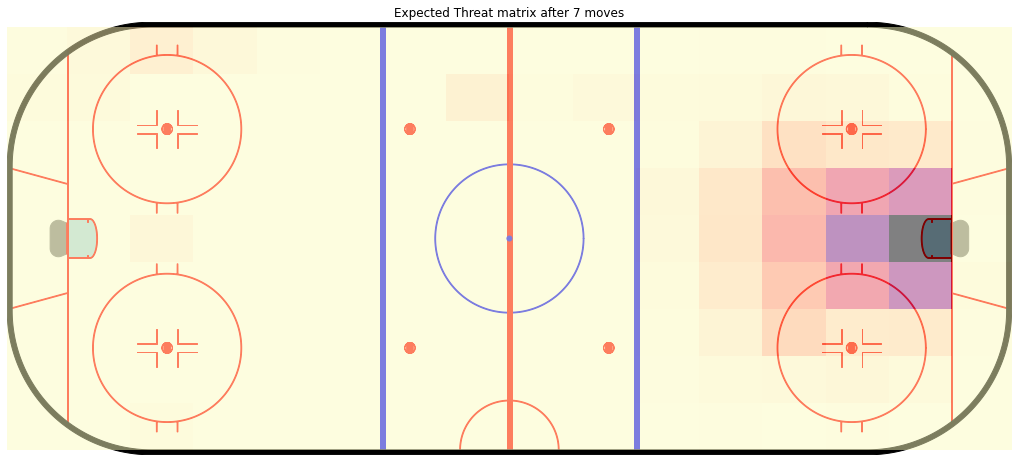

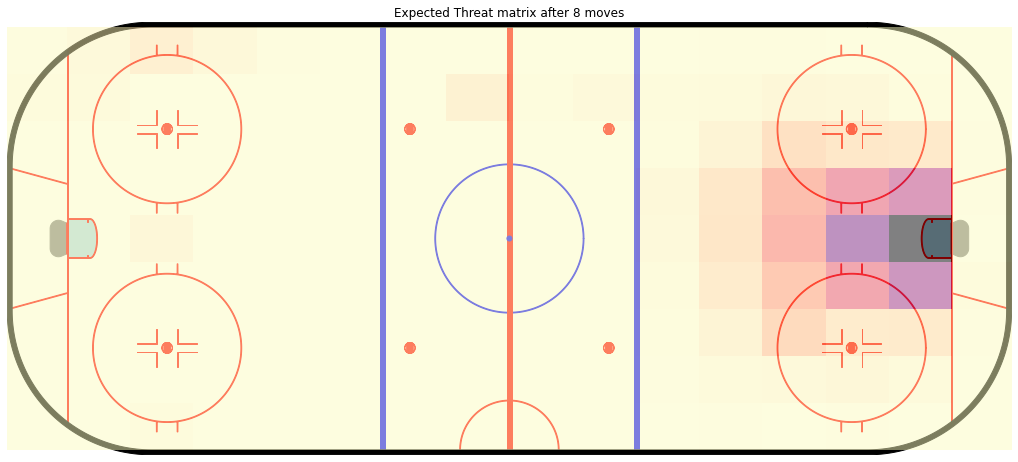

In [42]:
transition_matrices_array = np.array(transition_matrices)
xT = np.zeros((9, 16))
for i in range(8):
    shot_expected_payoff = goal_prob*shot_prob
    move_expected_payoff = move_prob*(np.sum(np.sum(transition_matrices_array*xT, axis=2), axis=1).reshape(9, 16))
    xT_old = xT
    xT = shot_expected_payoff + move_expected_payoff
    # print(np.sum(xT, axis=1) - np.sum(xT_old, axis=1))
    fig, ax = plt.subplots(figsize=(18, 8))
    rink.draw(ax=ax)
    plt.imshow(xT, cmap='magma_r', origin='lower', extent=[-101.71428571, 101.71428571, -42.5, 42.5], alpha=0.5, zorder=100)
    txt = 'Expected Threat matrix after ' +  str(i+1) + ' moves'
    plt.title(txt)
    plt.show()
    # print(xT)

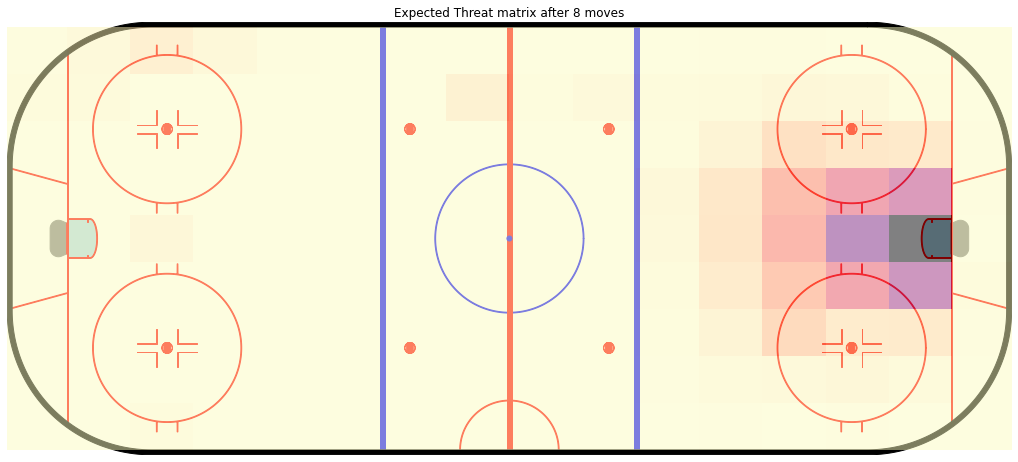

In [43]:
fig, ax = plt.subplots(figsize=(18, 8))
rink.draw(ax=ax)
plt.imshow(xT, cmap='magma_r', origin='lower', extent=[-101.71428571, 101.71428571, -42.5, 42.5], alpha=0.5, zorder=100)
txt = 'Expected Threat matrix after ' +  str(i+1) + ' moves'
plt.title(txt)
plt.show()

In [44]:
xT_against = np.flip(xT) * -1

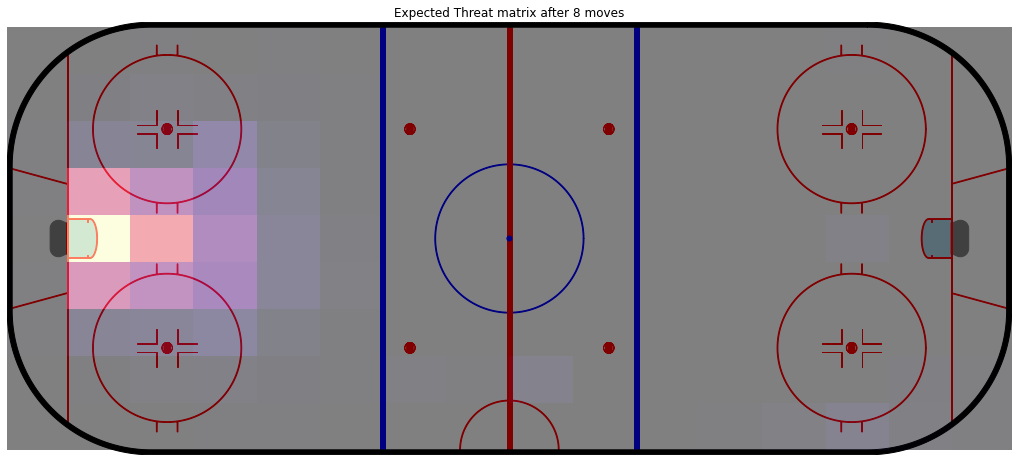

In [45]:
fig, ax = plt.subplots(figsize=(18, 8))
rink.draw(ax=ax)
plt.imshow(xT_against, cmap='magma_r', origin='lower', extent=[-101.71428571, 101.71428571, -42.5, 42.5], alpha=0.5, zorder=100)
txt = 'Expected Threat matrix after ' +  str(i+1) + ' moves'
plt.title(txt)
plt.show()

In [46]:
xT_net = xT + xT_against

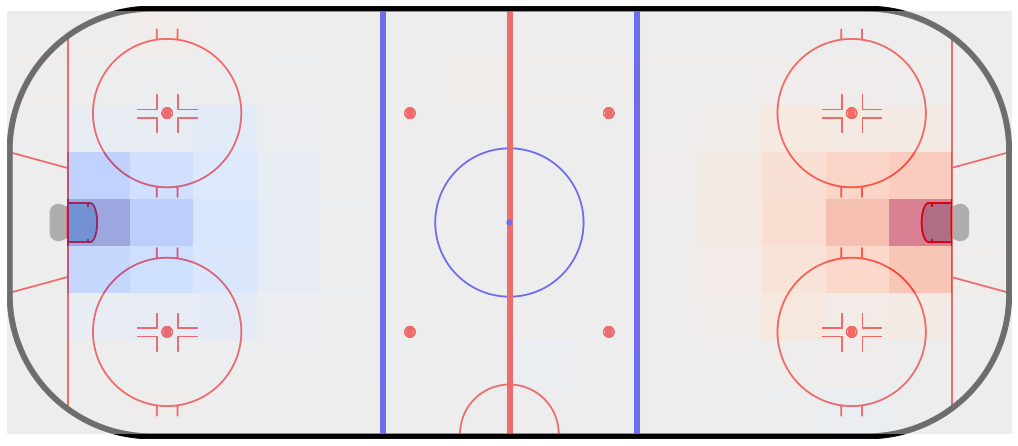

In [60]:
fig, ax = plt.subplots(figsize=(18, 8))
rink.draw(ax=ax)
plt.imshow(xT_net, cmap='coolwarm', origin='lower', extent=[-101.71428571, 101.71428571, -42.5, 42.5], alpha=0.5, zorder=100)
#txt = 'Expected Threat matrix after ' +  str(i+1) + ' moves'
#plt.title(txt)
plt.show()

fig.savefig('figs/xt_net_overview.png', dpi=300, bbox_inches='tight')

In [48]:
xT_net.min(), xT_net.max()

(-0.1578361377455443, 0.1578361377455443)

In [49]:
df_move.eventname.value_counts()

pass     17455
carry     4375
Name: eventname, dtype: int64

In [50]:
# passes
df_move.loc[(df_move["outcome_code"] == 1), 'xT'] = df_move.loc[df_move["outcome_code"] == 1].apply(lambda row: xT[row.y_end][row.x_end] - xT[row.y_start][row.x_start], axis = 1)
df_move.loc[(df_move["outcome_code"] == 0), 'xT'] = df_move.loc[df_move["outcome_code"] == 0].apply(lambda row: -xT[row.y_start][row.x_start], axis = 1)
df_move.loc[(df_move["outcome_code"] == 1), 'xT_against'] = df_move.loc[df_move["outcome_code"] == 1].apply(lambda row: xT_against[row.y_end][row.x_end] - xT_against[row.y_start][row.x_start], axis = 1)
df_move.loc[(df_move["outcome_code"] == 0), 'xT_against'] = df_move.loc[df_move["outcome_code"] == 0].apply(lambda row: xT_against[row.y_start][row.x_start], axis = 1)
df_move['xT_net'] = df_move['xT'] + df_move['xT_against']

In [51]:
df_games = df_games.merge(df_move[['eventid', 'xT','xT_against', 'xT_net']], on='eventid', how='left')

In [52]:
df_games.head()

,gameid,opposingteamgoalieoniceid,opposingteamid,playerid,teamgoalieoniceid,teamid,teaminpossession,currentpossession,xg,compiledgametime,eventname,ishomegame,manpowersituation,opposingteamskatersonicecount,outcome,period,playerprimaryposition,scoredifferential,teamskatersonicecount,type,xadjcoord,yadjcoord,eventid,outcome_code,is_exit,is_entry,is_blocked,is_saved,is_assist,is_goal,next_event,interruption,next_teamid,next_teaminpossession,prev_event,xadjcoord_end,yadjcoord_end,shot_seq,shot_seq_team,is_shot_seq_team,possession_seq,possession_seq_team,pos_seq_has_exit,xT,xT_against,xT_net
0,66445,506563.0,916,358235,940804.0,742,NaN,NaN,NaN,0.000000,faceoff_lost,1,evenStrength,5,failed,1,F,0,5,none,0.305008,-0.252941,0,0,0.0,0.0,0.0,0.0,0.0,0.0,faceoff,0,916,NaN,start,NaN,NaN,0,NaN,0,0,NaN,0,NaN,NaN,NaN
1,66445,940804.0,742,586302,506563.0,916,NaN,NaN,NaN,0.000000,faceoff,0,evenStrength,5,successful,1,F,0,5,recoveredwithentry,-0.305008,0.252941,1,1,0.0,0.0,0.0,0.0,0.0,0.0,lpr,0,742,NaN,faceoff_lost,0.197929,-0.752941,1,742.0,0,1,NaN,0,NaN,NaN,NaN
2,66445,506563.0,916,358235,940804.0,742,NaN,NaN,NaN,0.033333,lpr,1,evenStrength,5,failed,1,F,0,5,contested,-0.197929,0.752941,2,0,0.0,0.0,0.0,0.0,0.0,0.0,lpr,0,916,916.0,faceoff,7.849129,4.776470,1,742.0,1,1,NaN,0,NaN,NaN,NaN
3,66445,940804.0,742,689086,506563.0,916,916.0,0.0,NaN,0.100000,lpr,0,evenStrength,5,successful,1,D,0,5,faceoff,-7.849129,-4.776470,3,1,0.0,0.0,0.0,0.0,0.0,0.0,pass,0,916,916.0,lpr,-6.843246,-3.267647,1,742.0,0,2,916.0,1,NaN,NaN,NaN
4,66445,940804.0,742,689086,506563.0,916,916.0,0.0,NaN,0.166667,pass,0,evenStrength,5,successful,1,D,0,5,south,-6.843246,-3.267647,4,1,0.0,0.0,0.0,0.0,0.0,0.0,reception,0,916,916.0,lpr,-23.943245,7.294117,1,742.0,0,2,916.0,1,0.000049,0.000047,0.000096


In [53]:
df_games.to_csv('data/df_Linhac_games_with_xT.csv', index=False)
df_move.to_csv('data/df_Linahc_move_with_xT.csv', index=False)

In [54]:
df_move[['eventname', 'xT']].groupby('eventname').agg(['sum','mean','min', 'max', 'count'])

xT                                     
                 sum      mean       min       max  count
eventname                                                
carry       3.405232  0.000778 -0.008237  0.157758   4375
pass       16.523281  0.000949 -0.157843  0.157560  17419

In [55]:
np.savetxt('data/xT_net.csv', xT_net, delimiter=',')
np.savetxt('data/xT.csv', xT, delimiter=',')
np.savetxt('data/xT_against.csv', xT_against, delimiter=',')

In [56]:
df_move.xT_net.min(), df_move.xT_net.max()

(-0.16156174219865851, 0.1664005817668558)

In [57]:
df_move.xT.min(), df_move.xT.max()

(-0.1578428152408134, 0.15775817406793533)

In [58]:
df_move.xT_against.min(), df_move.xT_against.max()

(-0.1578428152408134, 0.15783126992302554)